In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from cvxopt import matrix, solvers
from scipy.stats import chi2

In [1]:
import scipy.io
mat = scipy.io.loadmat('hw6data.mat')

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Mar 25 21:42:06 2009',
 '__version__': '1.0',
 '__globals__': [],
 'Q': array([[ 0.001005,  0.001328, -0.000579, -0.000675,  0.000121,  0.000128,
         -0.000445, -0.000437],
        [ 0.001328,  0.007277, -0.001307, -0.00061 , -0.002237, -0.000989,
          0.001442, -0.001535],
        [-0.000579, -0.001307,  0.059852,  0.027588,  0.063497,  0.023036,
          0.032967,  0.048039],
        [-0.000675, -0.00061 ,  0.027588,  0.029609,  0.026572,  0.021465,
          0.020697,  0.029854],
        [ 0.000121, -0.002237,  0.063497,  0.026572,  0.102488,  0.042744,
          0.039943,  0.065994],
        [ 0.000128, -0.000989,  0.023036,  0.021465,  0.042744,  0.032056,
          0.019881,  0.032235],
        [-0.000445,  0.001442,  0.032967,  0.020697,  0.039943,  0.019881,
          0.028355,  0.035064],
        [-0.000437, -0.001535,  0.048039,  0.029854,  0.065994,  0.032235,
          0.035064,  0.079958]]),

In [27]:
cov = np.array([[ 0.001005,  0.001328, -0.000579, -0.000675,  0.000121,  0.000128, -0.000445, -0.000437],
              [ 0.001328,  0.007277, -0.001307, -0.00061 , -0.002237, -0.000989,  0.001442, -0.001535],
              [-0.000579, -0.001307,  0.059852,  0.027588,  0.063497,  0.023036,  0.032967,  0.048039],
              [-0.000675, -0.00061 ,  0.027588,  0.029609,  0.026572,  0.021465,  0.020697,  0.029854],
              [ 0.000121, -0.002237,  0.063497,  0.026572,  0.102488,  0.042744,  0.039943,  0.065994],
              [ 0.000128, -0.000989,  0.023036,  0.021465,  0.042744,  0.032056,  0.019881,  0.032235],
              [-0.000445,  0.001442,  0.032967,  0.020697,  0.039943,  0.019881,  0.028355,  0.035064],
              [-0.000437, -0.001535,  0.048039,  0.029854,  0.065994,  0.032235,  0.035064,  0.079958]])

mu = np.array([0.0007, 0.005, 0.065, 0.043, 0.0759, 0.0394, 0.0493, 0.0684])

R = np.array([[ 1.83523488e-02,  1.02707340e-02,  5.70859212e-02,
         -7.13960250e-02,  6.04130956e-02,  7.21974515e-02,
         -4.93745050e-02, -4.34698519e-03,  2.68166588e-02,
         -4.32816328e-02, -3.25340376e-02,  1.28297563e-02,
         -6.22635303e-02,  5.05400701e-02, -2.19668465e-02,
         -1.22042155e-02,  3.47503100e-02,  2.88298989e-02,
          7.92299570e-03, -4.79755004e-03, -1.51611812e-02,
          5.27267173e-02, -1.34556425e-02,  2.61880317e-02,
          4.11460300e-03,  5.86014112e-02,  8.17068770e-03,
         -8.10069071e-03,  9.48796551e-03,  1.58941736e-02,
         -7.09474287e-03,  3.35595349e-02,  4.18358576e-02,
          3.50573750e-02, -5.80192653e-03, -6.67264299e-03,
          5.66387209e-02,  1.81129559e-02, -2.42936003e-02,
         -2.06504142e-03, -5.51058096e-03, -2.16370043e-02,
          2.70922989e-02,  2.96151776e-02,  2.49195885e-02,
          2.22183701e-02,  1.19304514e-03, -6.90072913e-03,
         -3.83677693e-02,  6.42057963e-02, -6.95514239e-02,
         -2.32997242e-02, -7.82498743e-03,  2.79529107e-02,
          3.59806492e-02, -2.93650676e-04, -2.41267632e-02,
         -1.21140562e-02, -2.43251445e-02, -3.42636139e-02,
          8.55076669e-03,  1.31929701e-02,  1.76990598e-02,
         -2.45097994e-02, -7.32253498e-03,  1.29852820e-02,
          9.84126251e-02,  7.03534715e-03,  1.39447405e-02,
         -1.17603127e-02,  2.53932592e-03, -4.92615638e-02,
         -9.79480148e-03, -1.38033373e-03, -3.52388396e-02,
          8.32463572e-04,  1.42536812e-02,  3.43547103e-02,
         -2.12563639e-02, -2.38835259e-02,  2.71794009e-02,
          1.66912398e-02,  7.22816170e-03, -3.37360542e-02,
          2.78841407e-02, -6.70552143e-03,  5.14572368e-02,
          4.05918948e-02, -1.98350886e-02, -3.03468479e-02,
          5.41053445e-02, -2.20721258e-02,  8.11424393e-03,
         -2.00227342e-03, -7.74256015e-02, -1.63376528e-02,
         -2.23551194e-02, -1.78379043e-02,  7.77353140e-03,
         -3.05889125e-02,  7.28177395e-02,  4.74023643e-02,
          3.63169798e-02,  2.99313818e-02,  3.13624530e-02,
          2.80799950e-02, -7.15581845e-03, -3.82168667e-02,
          3.64127426e-02,  2.80239491e-02,  7.31791730e-03,
          8.02209692e-03, -3.33122875e-02,  1.99339766e-02,
          4.19317990e-02,  2.91372623e-02,  1.35598332e-02,
         -1.09135710e-02,  6.45130496e-02,  3.23384889e-02],
        [ 7.36880270e-02,  1.07435508e-02,  1.63242278e-01,
         -5.32641127e-02,  1.82565213e-01, -9.53496750e-03,
         -4.95896888e-02, -3.80046731e-02,  1.56111460e-03,
         -2.09295169e-01, -1.53444884e-01,  3.73672451e-02,
          4.28621449e-02,  1.83735797e-02, -1.28713398e-01,
         -5.66700470e-02,  1.14609472e-01,  5.98273084e-02,
         -9.69318148e-02, -6.80630717e-02,  4.06267906e-02,
          1.52022915e-01,  8.86714922e-02,  1.13455279e-01,
          1.23865356e-01,  9.50314546e-02,  1.35793431e-01,
          8.48886009e-03,  3.88319146e-03,  8.46683824e-02,
         -2.08928695e-02,  9.27164467e-03,  7.09596724e-02,
         -6.96645016e-02,  2.96393907e-02,  6.09950625e-02,
          9.77219639e-02, -2.88982961e-03,  6.33508562e-03,
         -1.96126798e-02, -8.25215057e-02, -1.45882224e-01,
         -9.80769657e-02,  8.64385069e-02,  6.75000548e-03,
          3.43439375e-02,  3.39251330e-02,  1.67306974e-02,
          2.56575718e-03,  9.01729388e-02, -5.66410335e-02,
         -4.46302566e-03,  3.55264166e-02,  8.07315368e-02,
          5.60063699e-02, -6.79162600e-02, -5.52143002e-02,
         -3.45930064e-02, -5.27922488e-02, -1.37409657e-02,
          3.48584779e-02,  7.15957479e-02, -6.62941332e-02,
          1.12001897e-02, -1.29348965e-02, -4.40478627e-02,
          1.78130083e-01,  3.70475240e-02, -3.58920553e-02,
         -7.81869667e-03, -6.29340984e-02, -4.58686947e-02,
         -1.49636773e-02,  7.02610085e-02, -2.34566453e-03,
         -7.54901379e-02, -1.53576523e-02,  6.04173466e-03,
         -5.69594177e-03, -3.54033488e-02,  6.90167852e-02,
          3.13774107e-02,  5.55395585e-02, -1.22745366e-01,
          7.07549264e-02,  3.63389144e-02,  4.75158951e-02,
          1.01927148e-01, -4.48105666e-02,  9.21628604e-03,
          1.67933905e-01, -1.67213738e-01, -1.62368019e-02,
         -1.34741769e-01, -7.20634939e-02, -3.44138331e-02,
         -1.01416199e-01,  8.15757629e-02, -6.82557052e-02,
          8.10999418e-03,  1.07776382e-01,  2.53069918e-02,
         -1.34215946e-01,  1.00227745e-02,  5.49621639e-02,
         -5.30118518e-02, -1.53386603e-02,  1.03063115e-03,
          6.90623361e-02,  1.53871978e-01, -4.32969924e-02,
         -9.41589054e-03, -1.26158810e-01, -2.27519344e-02,
          2.06899899e-01,  3.69655805e-02,  1.15360624e-01,
         -6.37930630e-02,  1.60250571e-01,  4.27129417e-02],
        [-5.62420629e-02, -2.17948138e-02,  4.15669778e-01,
          1.17000917e-01, -4.97397586e-02, -1.84915019e-02,
          3.33592616e-02, -8.13506288e-02,  5.59389925e-02,
          3.81359946e-01,  2.69955173e-01,  1.12416296e-01,
         -5.55533234e-02, -2.06912559e-01,  2.80065962e-01,
          1.65577415e-01, -1.35839186e-01,  9.40339970e-02,
          3.18770443e-02,  5.40300787e-01, -2.58936371e-01,
          1.53166159e-01,  2.97708906e-01,  2.66154659e-01,
         -1.97721339e-01,  1.57741297e-01, -2.54746157e-01,
          1.50157586e-01,  4.89290614e-01,  5.69083495e-02,
         -9.63889020e-02,  8.26017019e-02, -2.86092458e-01,
          1.31037106e-01,  1.44599297e-01,  6.76546519e-02,
          1.33106357e-01,  2.94423451e-01, -1.56197972e-01,
          2.81566148e-01, -1.73604213e-01,  2.29624159e-01,
         -2.44990168e-01, -2.52289266e-01,  2.47817530e-02,
          5.11681773e-01,  3.38413618e-01,  4.71785855e-01,
          3.35399854e-01, -4.52872460e-01,  3.74653797e-01,
          8.77199169e-03, -2.66061357e-01,  6.57718965e-02,
          4.83492093e-01,  5.43086517e-02,  2.84349811e-01,
         -6.80610755e-02,  3.48186785e-01, -1.15174664e-01,
          2.12573889e-01, -1.26072798e-01, -1.41527898e-01,
          3.38189232e-01, -1.17391075e-02,  7.72767835e-02,
          1.46269238e-01, -3.59997244e-01,  3.28216635e-01,
          1.61563971e-01, -1.36677389e-01,  3.68819918e-01,
          3.45722974e-01, -4.99802124e-01,  3.49016076e-01,
         -1.79367225e-01,  3.21875361e-01,  2.63087637e-01,
          1.90837258e-01,  3.77557412e-01, -5.16509896e-01,
          3.55206824e-02,  4.55784918e-01, -4.78878403e-02,
          1.59814852e-01,  7.50394589e-02, -1.36882541e-01,
         -1.89532904e-01,  1.40647438e-01,  6.20873895e-01,
         -7.31994338e-03, -6.63077204e-01, -1.59470105e-01,
         -9.92941568e-02,  3.52513872e-01,  1.78628897e-01,
         -8.03620424e-02,  1.42263468e-01, -6.03837459e-02,
         -6.97910225e-02, -5.61181753e-02, -6.28033035e-02,
         -3.32477739e-02,  5.75823091e-01,  4.41839499e-01,
          5.99365286e-01,  1.94728050e-01,  3.26378420e-02,
          3.81552612e-01, -3.62092462e-01,  4.71419658e-02,
          3.69279940e-01, -2.56261205e-01, -1.89964287e-01,
         -1.67406524e-01,  1.22465259e-01,  1.49096794e-01,
          2.10842649e-01,  4.32711733e-01,  4.68342038e-01],
        [-1.16084130e-01,  1.36905371e-01,  9.31460596e-02,
          1.40232919e-01,  4.82244327e-02,  5.97241255e-02,
         -2.80063107e-02,  7.11884477e-02, -1.02968614e-01,
          1.79499602e-01,  6.89965874e-02,  1.90385324e-01,
          4.25572036e-02, -9.69419920e-02,  1.39420508e-01,
          7.49552958e-02, -1.19665251e-01,  1.61180675e-01,
          3.19245307e-02,  3.23144977e-01, -1.03157922e-01,
          2.04098640e-01,  4.04964583e-01,  1.51377746e-01,
         -1.25269160e-01,  1.34207588e-01,  6.74445001e-02,
          1.58980264e-01,  8.56661868e-02,  4.46204881e-02,
          2.94438906e-03,  3.43033969e-02, -4.17265990e-01,
          2.37077669e-01,  1.75485107e-01, -6.55587868e-02,
          6.18248076e-02,  1.32164648e-01, -2.64877895e-01,
          3.11142883e-01,  4.82136674e-02, -1.01548255e-01,
         -1.04528038e-01, -8.20724109e-02, -8.98043917e-02,
          4.53885749e-02,  1.85378016e-01,  2.12303501e-01,
          2.14177123e-01, -1.96882913e-01,  1.86504687e-01,
          2.45182569e-01, -4.19277016e-02, -2.64208172e-02,
          2.40250324e-01, -7.32147364e-02,  1.92759885e-01,
         -1.20684786e-01,  2.13667419e-01, -3.59806031e-01,
          2.17565502e-01,  1.66027804e-01,  2.32194819e-03,
          2.47522748e-01, -1.16040685e-01, -2.28242823e-02,
          1.21678414e-01, -8.00425613e-02, -2.39630798e-02,
         -7.01744451e-02, -1.23835984e-01,  2.19496482e-01,
          5.86753869e-02, -1.66582581e-01,  2.28192266e-01,
         -2.59443442e-01, -4.82313225e-02,  1.57008969e-01,
          3.02717231e-01,  2.57716214e-01, -2.19247929e-01,
         -1.11646836e-01,  1.50174431e-01,  2.33727376e-02,
         -5.61953268e-02, -1.44131221e-01, -2.09811905e-02,
         -3.66913782e-02,  5.16829656e-02,  2.34431104e-01,
         -6.62199946e-02, -4.18719041e-01, -4.46378593e-03,
          1.44115350e-03,  2.09152874e-01, -1.48771741e-01,
         -1.54438621e-01,  4.45281664e-02, -6.77447311e-02,
         -7.13719048e-03, -1.09941567e-01, -9.71763137e-02,
          3.49604325e-02,  2.92458594e-01,  1.76129867e-01,
          4.28385193e-01,  1.13503220e-01, -6.31083136e-02,
         -1.91874183e-02, -5.38412426e-02,  1.12760160e-01,
          2.72475149e-01,  6.91882753e-02, -3.54329762e-01,
         -1.75429081e-01,  6.81548810e-02,  2.63681296e-01,
          5.58255605e-02,  1.16886815e-01,  2.64197799e-01],
        [-3.05818161e-02,  6.90830239e-02,  3.87085077e-01,
          3.34189515e-01,  2.50875453e-01, -8.49845767e-02,
         -4.31379525e-02, -4.66933790e-01,  4.00834226e-02,
          7.40477752e-02,  4.41167299e-01,  1.07943469e-01,
         -2.85908134e-01, -5.66905613e-02,  1.31688072e-01,
         -6.99518838e-02, -2.22968073e-01,  1.95184618e-02,
         -2.78732308e-02,  9.23966060e-01, -3.83386555e-01,
         -2.03469510e-01,  3.22565757e-01,  3.22576178e-01,
         -5.58188507e-02, -4.36888678e-02, -1.44776251e-01,
          8.69934064e-02,  5.85924305e-01,  1.27912838e-01,
         -1.64463591e-01,  2.41597670e-01, -1.50080030e-01,
          3.07577459e-01,  1.17327755e-01,  1.54049275e-01,
         -1.16430033e-01, -2.48649612e-01, -2.44259217e-01,
          4.26508263e-01, -2.60739072e-01,  2.85384446e-01,
         -7.48908097e-02, -1.09855161e-01,  1.29337099e-01,
          6.49054873e-01,  1.24072625e-01,  6.48897378e-01,
          6.41008113e-01, -4.03557056e-01,  1.92926529e-01,
         -1.54772660e-01, -4.87798192e-01,  8.82718966e-02,
          6.74836769e-01,  3.88883974e-01,  3.66388930e-01,
         -1.61334289e-01,  2.70036476e-01,  2.03458380e-01,
          2.24619740e-01, -1.00783001e-02, -9.53776199e-02,
          4.24027270e-01, -1.63978541e-01,  2.65044211e-01,
          3.59712202e-01, -3.72502288e-01,  2.74515182e-01,
          6.34381785e-01, -2.39309288e-01,  5.33907678e-01,
          6.03929885e-01, -1.37953434e-01,  3.07202391e-01,
         -7.42695940e-02,  4.53075411e-01,  3.75639770e-01,
          1.64611836e-01,  5.68620718e-01, -5.63782592e-01,
          2.61527059e-01,  5.86061535e-01,  1.80695983e-01,
          2.14519417e-01,  8.02560478e-02, -2.30380420e-01,
         -2.61086287e-01,  3.58695007e-01,  7.68623660e-01,
         -2.65118490e-01, -7.03939826e-01, -2.44548968e-01,
         -2.05887293e-01,  5.21786815e-01,  3.07888997e-01,
         -1.36727657e-01,  5.21920555e-01,  9.32955609e-02,
         -3.79351434e-01,  3.15593781e-01, -4.33069737e-01,
          7.00026324e-02,  6.79095099e-01,  4.16486842e-01,
          6.46456588e-01,  2.51294705e-01,  8.06673047e-02,
          4.90755148e-01, -7.31529868e-01, -2.32525555e-01,
          3.90588161e-01, -2.90483056e-01, -3.07308396e-01,
         -1.06377411e-01, -5.56163395e-02,  1.24835762e-01,
          1.36903994e-01,  7.17243669e-01,  7.34566450e-01],
        [-1.04539862e-01,  1.79395733e-01,  1.13723340e-01,
          1.71304304e-01,  2.62568588e-01,  2.06333706e-02,
         -6.89805879e-02, -1.24419114e-01, -4.03529303e-02,
         -1.40819178e-01,  7.97140556e-02,  5.25914616e-02,
         -1.79060955e-01, -2.84415564e-02, -9.50987359e-02,
          1.70419970e-03, -1.20631180e-01,  9.48185787e-02,
          5.11480847e-02,  3.66534637e-01, -4.23266989e-02,
         -1.26788657e-01,  2.63400635e-01,  1.51829280e-01,
         -1.29557638e-01, -5.42941364e-03,  9.32646516e-02,
          9.96583951e-02,  8.15586073e-02,  4.60394985e-02,
         -6.63222077e-02,  2.11657574e-01, -1.72588984e-01,
          3.75178074e-01,  1.59058772e-01, -7.41161043e-03,
          1.94337170e-02, -2.46930777e-01, -2.97579265e-01,
          3.64174388e-01, -7.39401272e-02, -1.78326582e-01,
          5.90187998e-02, -3.44318427e-02, -5.47407403e-02,
          6.40677681e-02,  4.75959783e-02,  1.34646071e-01,
          3.97051771e-01, -1.49767068e-01, -1.87828894e-02,
          1.39161868e-01, -1.34778122e-01, -2.67027801e-02,
          3.91704442e-01,  1.44437270e-01,  1.73891338e-01,
         -1.24971816e-01,  1.15894317e-01, -6.79890436e-02,
          1.75581127e-01,  1.61801013e-01,  2.92555044e-02,
          2.51697504e-01, -3.24993012e-01,  5.87375071e-02,
          3.16370755e-01, -4.47794558e-02, -9.31787742e-02,
          2.35473238e-01, -6.43572043e-02,  1.30784104e-01,
          2.66185742e-01,  5.01358563e-02,  4.89522084e-03,
         -1.34573609e-01, -1.63474669e-02,  1.73732659e-01,
          1.79789501e-01,  3.02782396e-01, -1.88825549e-01,
         -6.23584488e-02,  1.73163965e-01,  1.79938587e-01,
         -1.32040589e-01, -1.99389067e-02,  6.24742123e-02,
         -1.34801751e-01,  5.59406531e-02,  2.54238781e-01,
         -2.63590777e-01, -4.08517352e-01, -2.50916226e-02,
          2.43343350e-02,  2.43450351e-01, -7.42821625e-02,
         -1.97945609e-01,  2.00743778e-02, -6.26451583e-02,
         -1.51309089e-01,  8.76795573e-02, -2.61545898e-01,
          1.00383683e-02,  4.13267914e-01,  1.44622076e-01,
          4.41470420e-01,  1.83565232e-01, -3.19822588e-02,
          7.62001175e-02, -3.24049014e-01, -7.46333934e-02,
          2.94153152e-01, -7.91701199e-03, -3.50023730e-01,
         -4.05770645e-02, -3.17061304e-02,  1.78866875e-01,
          9.37284002e-04,  2.00565623e-01,  2.84381880e-01],
        [-1.12755930e-01, -4.23570955e-03,  1.67467536e-01,
          2.70915688e-01,  1.09500787e-01, -7.98877472e-02,
          5.39416206e-02, -1.22735691e-01, -8.84074180e-02,
          1.91041834e-01,  1.15989107e-01,  6.45953772e-02,
          8.28119530e-02, -2.15953523e-01, -7.28010769e-02,
         -1.69709845e-02, -1.17637234e-01,  1.53978945e-01,
         -7.97168701e-02,  3.71450222e-01, -8.72611016e-02,
          2.44099770e-01,  4.76991081e-01,  1.77653385e-01,
         -1.07660573e-01,  8.57584375e-02,  8.64373618e-02,
         -1.02282783e-02,  4.22859746e-01,  9.34430294e-02,
         -2.07701369e-01,  3.21577154e-02, -3.17969348e-01,
          9.65080833e-02,  3.06472066e-01,  1.18164853e-01,
          9.89673662e-02,  4.93120142e-02, -8.26512740e-02,
          4.32879558e-02, -2.17050956e-01, -1.83253803e-02,
         -1.60318027e-01, -1.97540032e-01,  1.28409433e-01,
          4.05856109e-01,  2.13549872e-01,  3.03381161e-01,
          2.84245326e-01, -3.11040512e-01,  1.81489135e-01,
          8.72079440e-02, -2.00425451e-01,  1.38932363e-01,
          3.90732999e-01, -2.67702865e-02,  2.31922642e-01,
         -6.10361416e-02,  1.83945034e-01,  4.19255944e-02,
          4.95988541e-02,  4.24798176e-02, -6.86142753e-02,
          3.68389516e-01, -9.29711985e-02, -1.75870955e-01,
          2.18361307e-01, -1.08537583e-01,  3.15820654e-02,
          2.80699772e-01, -1.07197557e-01,  3.26673929e-01,
          1.61125043e-01, -1.54639346e-01,  1.20715269e-01,
         -1.68906478e-01,  2.58986476e-01,  2.50824825e-01,
          1.74910342e-01,  2.87499996e-01, -2.58496331e-01,
          7.94187298e-02,  2.43269783e-01, -1.53564034e-02,
          1.64562360e-01, -8.08351485e-03,  8.80112236e-02,
         -8.35041058e-02,  5.17208387e-02,  5.54185210e-01,
         -4.07816739e-02, -5.07702859e-01, -9.28707861e-02,
         -7.90199137e-02,  3.64148415e-01,  3.72995718e-02,
         -2.20287104e-01,  1.96050402e-01, -4.14727705e-02,
         -1.48292439e-01, -2.46302501e-02, -1.69163699e-01,
         -5.56415770e-04,  4.45231175e-01,  3.04902700e-01,
          3.75699024e-01,  1.27887864e-01,  3.88017017e-03,
          2.28374259e-01, -3.55441375e-01, -7.36331847e-04,
          2.56061608e-01, -1.36064475e-01, -9.41890008e-02,
          1.47985892e-01,  2.94165779e-02,  1.97638074e-01,
         -1.92610286e-02,  2.69401657e-01,  3.57568464e-01],
        [-9.31054895e-02,  5.71726319e-02,  2.17663346e-01,
          5.71574232e-01,  2.76810572e-01,  1.80429900e-01,
         -1.61200155e-01, -3.89877434e-01, -8.42421475e-02,
          1.32295980e-01,  2.03839017e-01,  4.20412895e-01,
         -1.21704136e-01, -1.99781417e-01,  1.08111801e-01,
         -2.29657615e-01, -3.25576776e-01,  2.00983191e-01,
         -4.09304886e-02,  6.89666076e-01, -1.91686105e-01,
          2.85965159e-01,  2.69529500e-01,  2.21661158e-01,
         -1.38017810e-01,  3.31703128e-02, -6.58384570e-02,
          7.94621951e-02,  3.57295849e-01, -2.54224574e-03,
          4.19224157e-02,  3.23608416e-01, -6.17254451e-01,
          4.47867692e-01,  5.68058216e-01,  2.12447442e-01,
         -9.39884633e-03, -1.14315610e-01, -3.88888938e-01,
          1.91030116e-01, -1.56618952e-01,  2.28644341e-01,
         -5.00668608e-02,  7.49498107e-02,  1.95039931e-02,
          2.65259337e-01,  1.22122222e-01,  5.19103154e-01,
          4.20305133e-01, -2.71044542e-01,  2.20434622e-01,
          1.59684950e-02, -3.37106291e-01, -1.19054532e-01,
          6.09641456e-01,  1.36926762e-01,  2.04267355e-01,
         -2.18783952e-01,  2.93266745e-01,  2.72586884e-01,
          2.69241825e-01,  3.77941322e-01, -1.93235673e-01,
          3.52103685e-01, -9.79498616e-02,  9.38690656e-02,
          3.45315389e-01, -6.22688964e-02,  1.34910903e-01,
          3.35994795e-01, -2.01229363e-01,  6.41668801e-01,
          3.01892725e-01, -2.72551932e-02,  3.58719391e-01,
         -1.31419878e-01,  2.86767049e-01,  2.55596420e-01,
          2.88211062e-01,  4.36434856e-01, -4.20973546e-01,
          1.48578739e-01,  4.85128252e-02,  1.07728010e-01,
          2.02943234e-01, -2.52541663e-01,  4.70030947e-02,
         -2.92506608e-01,  2.54261957e-01,  6.67526099e-01,
         -2.62898883e-01, -3.32359882e-01, -2.56748425e-01,
         -3.25876599e-02,  6.00811722e-01, -2.06657870e-01,
         -5.16432791e-01,  3.96592524e-01,  5.14648425e-02,
         -3.52503508e-01,  2.61420963e-01, -3.71613507e-01,
          3.22166326e-01,  3.63135249e-01,  5.57851684e-01,
          2.86313574e-01,  1.99639090e-01,  4.01769677e-02,
          2.48889408e-02, -5.60588936e-01, -3.44061432e-01,
          4.05181509e-01, -5.43429748e-02, -3.35887796e-01,
         -3.29804895e-01,  1.07923470e-01,  3.38968878e-01,
          6.04984858e-02,  9.51821570e-02,  6.20080426e-01]])

In [151]:
def build_frontier(true_return, true_cov, estimated_return, sigma, risk_level, eta):
    
    N_asset = len(true_return)
    L = np.linalg.cholesky(true_cov)
    
    #Calculate true frontier
    c = matrix(-true_return)
    A = matrix(np.array([[1.0 for i in range(N_asset)]]), tc='d')
    b = matrix(np.array([1.0]), tc='d')
    
    Gl = matrix(np.diag([-1.0 for i in range(N_asset)]), tc='d')
    hl = matrix(np.array([0.0 for i in range(N_asset)]), tc='d')
    Gq = [matrix(np.vstack([np.array([0.0 for i in range(N_asset)]), (-1)*L]))]
    hq = [matrix(np.array([np.sqrt(risk_level)] + [0.0 for i in range(N_asset)]))]
    
    sol = solvers.socp(c, Gl = Gl, hl = hl, Gq = Gq, hq = hq, A = A, b = b)
    w_true = sol['x']
    
    r_true = -sol['primal objective']
    
    #Calculate estimated Markowitz frontier
    c = matrix(-estimated_return)
    A = matrix(np.array([[1.0 for i in range(N_asset)]]), tc='d')
    b = matrix(np.array([1.0]), tc='d')
    
    Gl = matrix(np.diag([-1.0 for i in range(N_asset)]), tc='d')
    hl = matrix(np.array([0.0 for i in range(N_asset)]), tc='d')
    Gq = [matrix(np.vstack([np.array([0.0 for i in range(N_asset)]), (-1)*L]))]
    hq = [matrix(np.array([np.sqrt(risk_level)] + [0.0 for i in range(N_asset)]))]
    
    sol = solvers.socp(c, Gl = Gl, hl = hl, Gq = Gq, hq = hq, A = A, b = b)
    w_estimated = sol['x']
    
    r_estimated = -sol['primal objective']
    
    #Calculate Actual Markowitz frontier
    r_actual = np.dot(true_return, w_estimated)[0]
    
    #Calculate Estimated Robust frontier
    kappa = np.sqrt(chi2.ppf(eta, df = N_asset))
    P = np.linalg.cholesky(sigma)
    
    c = matrix(np.append(-estimated_return, [kappa]))
    A = matrix(np.array([[1.0 for i in range(N_asset)] + [0.0]]), tc='d')
    b = matrix(np.array([1.0]), tc='d')
    
    Gl = matrix(np.diag([-1.0 for i in range(N_asset+1)]), tc='d')
    hl = matrix(np.array([0.0 for i in range(N_asset+1)]), tc='d')
    G_0 = np.hstack([(-1)*L, np.array([[0.0] for i in range(N_asset)])])
    G_0 = np.vstack([np.array([0.0 for i in range(N_asset+1)]), G_0])
    Gq = [matrix(G_0)]
    hq = [matrix(np.array([np.sqrt(risk_level)] + [0.0 for i in range(N_asset)]))]
    G_1 = np.hstack([(-1)*P, np.array([[0.0] for i in range(N_asset)])])
    G_1 = np.vstack([np.array([0.0 for i in range(N_asset)] + [-1.0]), G_1])
    Gq += [matrix(G_1)]
    hq += [matrix(np.array([0.0 for i in range(N_asset+1)]))]
    
    sol = solvers.socp(c, Gl = Gl, hl = hl, Gq = Gq, hq = hq, A = A, b = b)
    w_estimated_robust = sol['x'][:-1]
    
    r_estimated_robust= np.dot(estimated_return, w_estimated_robust)[0]
    
    #Calculate Actual Markowitz frontier
    r_actual_robust = np.dot(true_return, w_estimated_robust)[0]
    
    return (w_true, w_estimated, w_estimated_robust, 
            r_true, r_estimated, r_actual, r_estimated_robust, r_actual_robust)

In [162]:
risk_levels = np.arange(0.005, 0.015, 0.001)
frontier = pd.DataFrame(data = None, index = [risk for risk in risk_levels],
                        columns = ['true frontier', 'estimated frontier', 'actual frontier',
                                   'estimated robust frontier', 'actual robust frontier'])

for risk in risk_levels:
    results = build_frontier(true_return = mu, true_cov = cov, estimated_return = np.mean(R,axis = 1), 
             sigma = np.diag(np.diag(cov/100)), risk_level = risk, eta = 0.95)
    frontier.loc[risk] = [results[i] for i in range(3,8)]

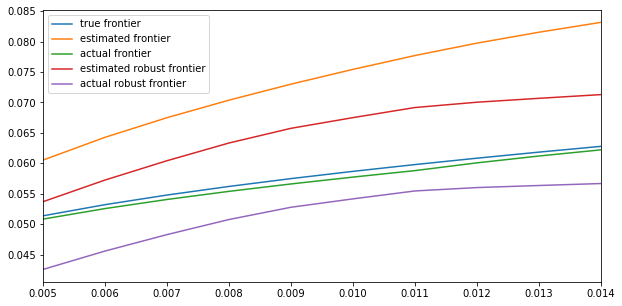

In [173]:
frontier.plot(figsize=(10, 5))